# Using the iris dataset in sklearn, build a random forest tree model.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading inbuilt dataset 1: Iris
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
#exploring iris dataset
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.data_module

'sklearn.datasets.data'

In [8]:
#Converting iris dataset to dataframe
iris_df=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'target':iris.target
})

In [9]:
#checking the first ten rows of the iris dataset
iris_df.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
#checking for the info of the iris dataset to know the data types distribution
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
#checking for ten random distribution of the iris dataset
iris_df.sample(10)

,sepal length,sepal width,petal length,petal width,target
67,5.8,2.7,4.1,1.0,1
75,6.6,3.0,4.4,1.4,1
90,5.5,2.6,4.4,1.2,1
5,5.4,3.9,1.7,0.4,0
106,4.9,2.5,4.5,1.7,2
109,7.2,3.6,6.1,2.5,2
17,5.1,3.5,1.4,0.3,0
144,6.7,3.3,5.7,2.5,2
61,5.9,3.0,4.2,1.5,1
129,7.2,3.0,5.8,1.6,2


In [12]:
#checking the number of rows and columns of the iris dataset
iris_df.shape

(150, 5)

In [13]:
#defining a function to further explore the iris dataset
def iris_info():
    info = pd.DataFrame(index = iris_df.columns)
    info["null values"] = iris_df.isnull().sum()
    info["duplicate"] = iris_df.duplicated().sum()
    info["unique values"] = iris_df.nunique()
    info["data type"] = iris_df.dtypes
    return info
iris_info()

,null values,duplicate,unique values,data type
sepal length,0,1,35,float64
sepal width,0,1,23,float64
petal length,0,1,43,float64
petal width,0,1,22,float64
target,0,1,3,int32


In [14]:
#dropping the duplicate in the iris dataset
iris_df.drop_duplicates(inplace = True)

In [15]:
#calling function to ascertain result
iris_info()

,null values,duplicate,unique values,data type
sepal length,0,0,35,float64
sepal width,0,0,23,float64
petal length,0,0,43,float64
petal width,0,0,22,float64
target,0,0,3,int32


Training and Testing

Importing train_test_split function

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#assigning feature and target labels 
X= iris_df.drop("target", axis = 1)
y= iris_df.target

In [18]:
#splitting iris dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #80% training and 20% testing.

In [19]:
#import random forest classifier from ensemble module in sklearn
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier (n_estimators = 100) #built the 100 decision trees to get better performance of predictions.

In [20]:
#Training the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
#Calling X_test
X_test

,sepal length,sepal width,petal length,petal width
93,5.0,2.3,3.3,1.0
78,6.0,2.9,4.5,1.5
102,7.1,3.0,5.9,2.1
91,6.1,3.0,4.6,1.4
17,5.1,3.5,1.4,0.3
29,4.7,3.2,1.6,0.2
83,6.0,2.7,5.1,1.6
88,5.6,3.0,4.1,1.3
100,6.3,3.3,6.0,2.5
126,6.2,2.8,4.8,1.8


In [22]:
#Calling y_test
y_test

93     1
78     1
102    2
91     1
17     0
29     0
83     1
88     1
100    2
126    2
53     1
37     0
134    2
136    2
57     1
86     1
39     0
103    2
107    2
64     1
4      0
110    2
58     1
111    2
6      0
33     0
56     1
32     0
11     0
135    2
Name: target, dtype: int32

In [23]:
model.score(X_test, y_test)

0.9666666666666667

Prediction of Iris dataset

In [24]:
y_predicted_value = model.predict(X_test)
y_predicted_value

array([1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 1, 0, 0, 2])

In [25]:
#checking for accuracy of predicted model
from sklearn import metrics
accuracy= metrics.accuracy_score(y_test, y_predicted_value)
print("Accuracy:",accuracy)

Accuracy: 0.9666666666666667


Confusion Matrix of iris dataset

In [26]:
from sklearn.metrics import confusion_matrix
con_max = confusion_matrix(y_test, y_predicted_value)
con_max

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]], dtype=int64)

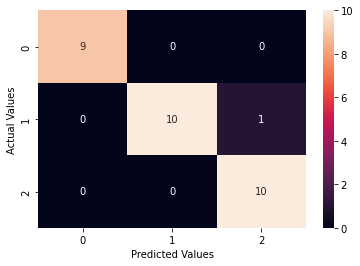

In [27]:
#plotting heatmap to visualize the confusion matrix of iris dataset
sns.heatmap(con_max, annot = True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Predicted Values: Setosa: 0
               Versicolor: 1
                Virginica: 2
The confusion matrix for iris dataset shows a multiclass classification.

Classification Report

In [28]:
#importing classification report library
from sklearn.metrics import classification_report
cr=classification_report
cr

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [29]:
#creating a classification report
print(classification_report(y_test, y_predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Support Vector Machine Model

In [30]:
from sklearn import svm

In [31]:
model= svm.SVC(kernel="linear")

In [32]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
y_pred= model.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 1, 0, 0, 2])